In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Data Pre-Processing
dataset = pd.read_csv('Social_Network_Ads.csv')
x = dataset.iloc[ : , [ 2 , 3 ]].values
y = dataset.iloc[ : , 4 ].values

df = pd.DataFrame(dataset)
df



,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [2]:
# Splitting Dataset
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.50 , random_state = 0 )



In [3]:
# feature scaling

from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

df = pd.DataFrame(x_test)
df



,0,1
0,-0.757443,0.605897
1,0.021419,-0.485544
2,-0.270655,0.251916
3,-0.757443,0.369910
4,-0.270655,-0.485544
...,...,...
195,0.216134,0.340412
196,0.800281,-0.220058
197,2.065931,-0.721531
198,0.800281,0.222418


In [5]:
# Fitting Naive Bayes to training set

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)


GaussianNB()

In [6]:
#Predicting the test set result
y_pred= classifier.predict(x_test)
df = pd.DataFrame(y_pred)
df

,0
0,0
1,0
2,0
3,0
4,0
...,...
195,0
196,0
197,1
198,1


In [7]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[115   8]
 [ 20  57]]


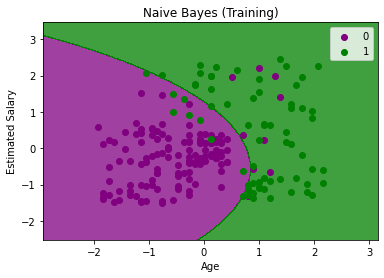

In [8]:
#Visualizing the training set result
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('purple', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color=ListedColormap(('purple', 'green'))(j), label=j)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Naive Bayes (Training)')
plt.legend()
plt.show()